# ***Data Load***

In [0]:
## Generacion de Archivos

# Importando librerias
import numpy as np
import io
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# encode "Sex"
from sklearn.preprocessing import LabelEncoder

# Carga de Archivo
from google.colab import files
uploaded = files.upload()

# Lectura Archivo
dataset = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
dataset.head(10)

Saving train.csv to train.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# ***Data Exploration***


***Class by Survived or died***

                     Class by Survived or died                      

Percentage of Class 1 that survived: 63.0 %
Percentage of Class 2 that survived: 47.0 %
Percentage of Class 3 that survived: 24.0 %
Percentage of Class 1 that died: 37.0 %
Percentage of Class 2 that died: 53.0 %
Percentage of Class 3 that died: 76.0 %


,1,2,3
Survived,136,87,119
Died,80,97,372


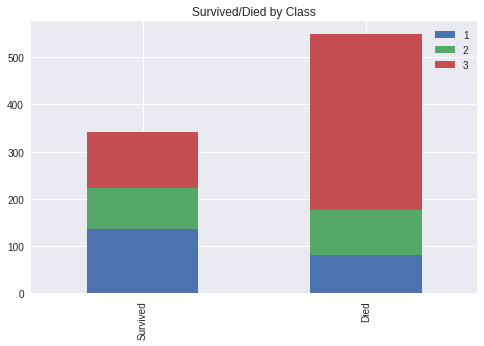

In [0]:
print("                     Class by Survived or died                      \n")

survived_class = dataset[dataset['Survived']==1]['Pclass'].value_counts()
dead_class = dataset[dataset['Survived']==0]['Pclass'].value_counts()
df_class = pd.DataFrame([survived_class,dead_class])
df_class.index = ['Survived','Died']
df_class.plot(kind='bar',stacked=True, figsize=(8,5), title="Survived/Died by Class")
Class1_survived= df_class.iloc[0,0]/df_class.iloc[:,0].sum()*100
Class2_survived = df_class.iloc[0,1]/df_class.iloc[:,1].sum()*100
Class3_survived = df_class.iloc[0,2]/df_class.iloc[:,2].sum()*100
print("Percentage of Class 1 that survived:" ,round(Class1_survived),"%")
print("Percentage of Class 2 that survived:" ,round(Class2_survived), "%")
print("Percentage of Class 3 that survived:" ,round(Class3_survived), "%")
Class1_died = df_class.iloc[1,0]/df_class.iloc[:,0].sum()*100
Class2_died = df_class.iloc[1,1]/df_class.iloc[:,1].sum()*100
Class3_died = df_class.iloc[1,2]/df_class.iloc[:,2].sum()*100
print("Percentage of Class 1 that died:" ,round(Class1_died),"%")
print("Percentage of Class 2 that died:" ,round(Class2_died), "%")
print("Percentage of Class 3 that died:" ,round(Class3_died), "%")
df_class

***Sex by Survived or died***

                     Sex by Survived or died                      

Percentage of Sex female that survived: 74.0 %
Percentage of Sex male that survived: 19.0 %
Percentage of Sex female that died: 26.0 %
Percentage of Sex male that died: 81.0 %


,female,male
Survived,233,109
Died,81,468


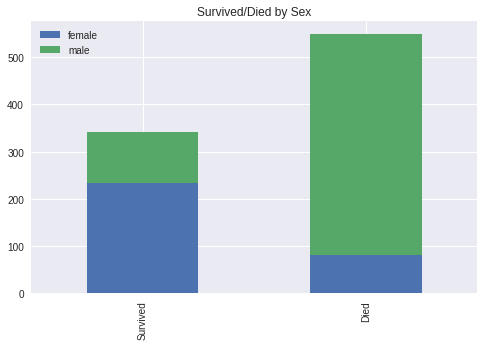

In [0]:
print("                     Sex by Survived or died                      \n")

survived_sex = dataset[dataset['Survived']==1]['Sex'].value_counts()
dead_sex = dataset[dataset['Survived']==0]['Sex'].value_counts()
df_sex = pd.DataFrame([survived_sex,dead_sex])
df_sex.index = ['Survived','Died']
df_sex.plot(kind='bar',stacked=True, figsize=(8,5), title="Survived/Died by Sex")
Sex1_survived= df_sex.iloc[0,0]/df_sex.iloc[:,0].sum()*100
Sex2_survived = df_sex.iloc[0,1]/df_sex.iloc[:,1].sum()*100
print("Percentage of Sex female that survived:" ,round(Sex1_survived),"%")
print("Percentage of Sex male that survived:" ,round(Sex2_survived), "%")
Sex1_died = df_sex.iloc[1,0]/df_sex.iloc[:,0].sum()*100
Sex2_died = df_sex.iloc[1,1]/df_sex.iloc[:,1].sum()*100
print("Percentage of Sex female that died:" ,round(Sex1_died),"%")
print("Percentage of Sex male that died:" ,round(Sex2_died), "%")
df_sex

***Embarked by Survived or died***

                     Embarked by Survived or died                      

Percentage of embarked S that survived: 34.0 %
Percentage of embarked C that survived: 55.0 %
Percentage of embarked Q that survived: 39.0 %
Percentage of embarked S that died: 66.0 %
Percentage of embarked C that died: 45.0 %
Percentage of embarked Q that died: 61.0 %


,S,C,Q
Survived,217,93,30
Died,427,75,47


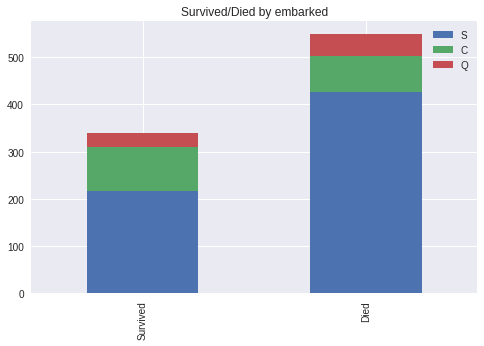

In [0]:
print("                     Embarked by Survived or died                      \n")

survived_embarked = dataset[dataset['Survived']==1]['Embarked'].value_counts()
dead_embarked = dataset[dataset['Survived']==0]['Embarked'].value_counts()
df_embarked = pd.DataFrame([survived_embarked,dead_embarked])
df_embarked.index = ['Survived','Died']
df_embarked.plot(kind='bar',stacked=True, figsize=(8,5), title="Survived/Died by embarked")
embarked1_survived= df_embarked.iloc[0,0]/df_embarked.iloc[:,0].sum()*100
embarked2_survived = df_embarked.iloc[0,1]/df_embarked.iloc[:,1].sum()*100
embarked3_survived = df_embarked.iloc[0,2]/df_embarked.iloc[:,2].sum()*100
print("Percentage of embarked S that survived:" ,round(embarked1_survived),"%")
print("Percentage of embarked C that survived:" ,round(embarked2_survived), "%")
print("Percentage of embarked Q that survived:" ,round(embarked3_survived), "%")
embarked1_died = df_embarked.iloc[1,0]/df_embarked.iloc[:,0].sum()*100
embarked2_died = df_embarked.iloc[1,1]/df_embarked.iloc[:,1].sum()*100
embarked3_died = df_embarked.iloc[1,2]/df_embarked.iloc[:,2].sum()*100
print("Percentage of embarked S that died:" ,round(embarked1_died),"%")
print("Percentage of embarked C that died:" ,round(embarked2_died), "%")
print("Percentage of embarked Q that died:" ,round(embarked3_died), "%")
df_embarked

# ***Data Cleaning***

***Drop unnecessary columns***

In [0]:
print("                     Drop unnecessary columns                      \n")

#drop unnecessary columns and the predictive column
X = dataset.drop(['PassengerId','Cabin','Ticket','Fare', 'Parch', 'SibSp'], axis=1)
y = X.Survived                       # vector of labels (dependent variable)
X=X.drop(['Survived'], axis=1)       # remove the dependent variable from the dataframe X
X.head(20)

                     Drop unnecessary columns                      



,Pclass,Name,Sex,Age,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,3,"Heikkinen, Miss. Laina",female,26.0,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,3,"Allen, Mr. William Henry",male,35.0,S
5,3,"Moran, Mr. James",male,NaN,Q
6,1,"McCarthy, Mr. Timothy J",male,54.0,S
7,3,"Palsson, Master. Gosta Leonard",male,2.0,S
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,S
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,C


***Clean Sex Column***

In [0]:
print("                     Transform Columns into Encode                      \n")
print("                                 Sex                                    \n")

labelEncoder_X = LabelEncoder()
X.Sex=labelEncoder_X.fit_transform(X.Sex)
X.Sex.head(10)

                     Transform Columns into Encode                      

                                 Sex                                    



0    1
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    0
9    0
Name: Sex, dtype: int64

***Clean Embarked Column***

In [0]:
print("                               Embarked                                     \n")

print ('Number of null values in Embarked:', sum(X.Embarked.isnull()))

#replace the null values with the value 'S'
row_index = X.Embarked.isnull()
X.loc[row_index,'Embarked']='S' 

print ('Number of null values in Embarked:', sum(X.Embarked.isnull()))

#build dummies columns
Embarked  = pd.get_dummies(  X.Embarked , prefix='Embarked'  )
X = X.drop(['Embarked'], axis=1) 
X = pd.concat([X, Embarked], axis=1) 
X = X.drop(['Embarked_S'], axis=1)
X.head()

                               Embarked                                     

Number of null values in Embarked: 2
Number of null values in Embarked: 0


,Pclass,Name,Sex,Age,Embarked_C,Embarked_Q
0,3,"Braund, Mr. Owen Harris",1,22.0,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0,0
4,3,"Allen, Mr. William Henry",1,35.0,0,0


***Clean Age Column***

                             Age                         
Number of null values in Age: 177


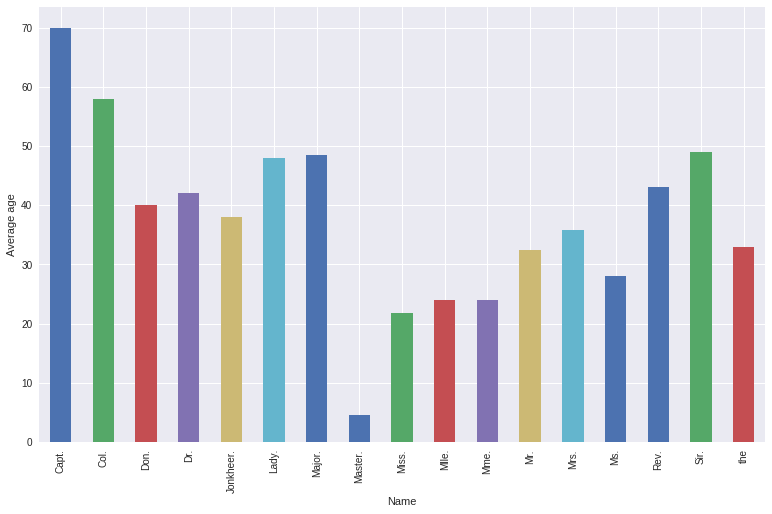

In [0]:
print ('                             Age                         ')

print ('Number of null values in Age:', sum(X.Age.isnull()))

#calculate the person type with the function split
got= dataset.Name.str.split(',').str[1]
X.iloc[:,1]=pd.DataFrame(got).Name.str.split('\s+').str[1]

#graph the average age by person type
ax = plt.subplot()
ax.set_ylabel('Average age')
X.groupby('Name').mean()['Age'].plot(kind='bar',figsize=(13,8), ax = ax)

#fill into a list the average values of person types 
title_mean_age=[]
title_mean_age.append(list(set(X.Name)))  #set for unique values of the title, and transform into list
title_mean_age.append(X.groupby('Name').Age.mean())
title_mean_age

#fill the missing ages into the main dataset
n_traning= dataset.shape[0]   #dataset rows number 
n_titles= len(title_mean_age[1]) #list rows number
for i in range(0, n_traning):
    if np.isnan(X.Age[i])==True:
        for j in range(0, n_titles):
            if X.Name[i] == title_mean_age[0][j]:
                X.Age[i] = title_mean_age[1][j]

#drop the Name Column after the calculate the average age
X=X.drop(['Name'], axis=1)
                

***Optional Cleaning***

In [0]:
print ('                             Optional Cleaning                         ')

#We can also make other feature transformation, 
#for expample we can divide in two groups, 
#first group age less than 18 years (youngsters), 
#second group age more than 18 years (adults)

#Clasification option
for i in range(0, n_traning):
    if X.Age[i] > 18:
        X.Age[i]= 0
    else:
        X.Age[i]= 1

X.head()


                             Optional Cleaning                         


,Pclass,Sex,Age,Embarked_C,Embarked_Q
0,3,1,0.0,0,0
1,1,0,0.0,1,0
2,3,0,0.0,0,0
3,1,0,0.0,0,0
4,3,1,0.0,0,0


# ***Test different classifiers***

***Logistic Regression***

In [0]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2',random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Logistic Regression:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")

Logistic Regression:
 Accuracy: 0.7923791283622745 +/- 0.020710145562598058 



***K - NN***

In [0]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("K-NN:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")

K-NN:
 Accuracy: 0.7666229712858927 +/- 0.03338302404718716 



***Soporte Vector Machine***

In [0]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("SVM:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")

SVM:
 Accuracy: 0.7924543184655544 +/- 0.03707008789369767 



***Naive Bayes***

In [0]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Naive Bayes:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")

Naive Bayes:
 Accuracy: 0.7778600612870277 +/- 0.023628201376894625 



***Random Forest***

In [0]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Random Forest:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std())

Random Forest:
 Accuracy: 0.8037024741800023 +/- 0.042533135655570195
